In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys, os, itertools

path = os.path.dirname(os.getcwd())
sys.path.append(path)

font_size = 15

label_dic = {"normal_trial": "Normal " + r"$\mathcal{D}^1$", 
             "normal_aipw": r"$\hat{\tau}^{ AIPW}$" + r" ($\mathcal{D}^1$" + " only)", 
             "normal_ppi": r"$\hat{\tau}^{ PP}$"+" (Ours)", 
             "hf_ppi": "Finite PPI", 
             "normal_obs": r"$\hat{\tau}^{ AIPW}$" + r" ($\mathcal{D}^2$" + " only)" ,
             'True ATE': r"$\tau$" + " (True in " + r"$\mathcal{D}^1$" + ")"}

color_dic = {"normal_ppi": "navy", "hf_ppi": "blue", "normal_trial": "orange", "normal_aipw": "gold", "normal_obs": "gray"}
tick_dic = {"normal_ppi": 0, "normal_trial": 0.4, "normal_aipw": 0.4, "normal_obs": 0.8}
# seq_dic = {"normal_ppi": 2, "hf_ppi": 3, "normal_trial": 0, "hf_trial": 1, "normal_obs": 4}
# seq_dic = {"normal_ppi": 1, "normal_aipw": 1, "normal_trial":0, "hf_trial": 3, "normal_obs": 2}

## Faithfulness

synthetic_data 0.05 [0, 1, 2, 4, 21]
synthetic_data 0.05 [0, 1, 2, 4, 21]
synthetic_data 0.05 [0, 1, 2, 4, 21]
synthetic_data 0.1 [1, 5, 9, 11, 21]
synthetic_data 0.1 [1, 5, 9, 11, 21]
synthetic_data 0.1 [1, 5, 9, 11, 21]


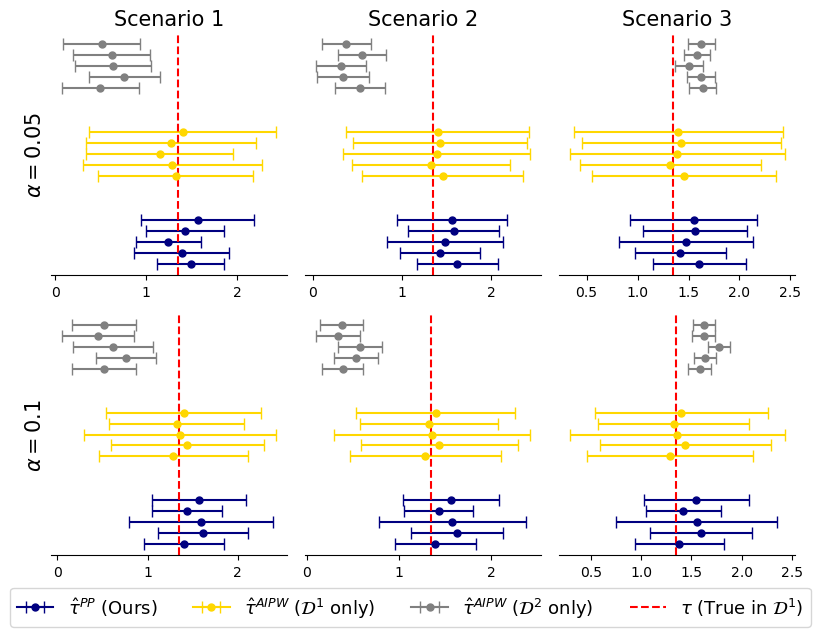

In [6]:
# name_list = ["normal_ppi", "hf_ppi", "normal_trial", "hf_trial", "normal_obs"]
# name_list = ["normal_aipw", "normal_trial", "normal_ppi", "normal_obs"]
# name_list = ["normal_trial", "normal_ppi", "normal_obs"]
name_list = ["normal_ppi", "normal_aipw", "normal_obs"]
seq_dic = {"normal_aipw": 0, "normal_trial": 1, "normal_ppi": 2, "normal_obs": 3}

alpha_list = [0.05, 0.1]
seed_list_dic = {
                    "rct_data": [list(range(0, 10, 2)), list(range(1, 11, 2))],
                    "synthetic_data": [[0, 1, 2, 4, 21], [1, 5, 9, 11, 21]]
                }
title_dic = {0: "Scenario 1", 1: "Scenario 2", 2: "Scenario 3"}

exp_name = "synthetic_data" # "synthetic_data", "RCT_data"
fig, ax = plt.subplots(2, 3, figsize=(8, 6))

for alpha_index in [0, 1]:
    for subplot_index in [0, 1, 2]:
        read_dir = f"{path}/code/{exp_name}/experiments_u/exp_results/alpha_{alpha_list[alpha_index]}"
        true_ate = []
        seed_list = seed_list_dic[exp_name][alpha_index]
        print(exp_name, alpha_list[alpha_index], seed_list)
        for seed in seed_list:
            df = pd.read_csv(f"{read_dir}/unconfounding_{subplot_index}/estimates_{seed}.csv")
            true_ate.append(df["true_ate"].to_list()[0])

            tick_list = []
            label_list = []
            for i in range(len(name_list)):
                # name = name_list[len(name_list) - (i+1)]
                name = name_list[i]
                df = pd.read_csv(f'{read_dir}/unconfounding_{subplot_index}/estimates_{seed}.csv', index_col=None)
                ate_est = df["ate_est"].to_list()[seq_dic[name]]
                ate_width = df["ate_ci_width"].to_list()[seq_dic[name]]
                # ax[alpha_index, subplot_index].fill_betweenx([tick_dic[name]+0.02*seed -left_width, tick_dic[name]+ 0.02 * seed +left_width], [ate_est-ate_width, ate_est-ate_width], [ate_est+ate_width, ate_est+ate_width], label=label_dic[name], color = color_dic[name], alpha = 0.7-0.05*seed)
                ax[alpha_index, subplot_index].errorbar(ate_est, tick_dic[name]+0.05*seed_list.index(seed), xerr=ate_width, capsize=4, color=color_dic[name], label = label_dic[name], marker='o',markersize=5.)

                tick_list.append(tick_dic[name])
                label_list.append(label_dic[name])


            ax[alpha_index, subplot_index].set_yticks([])
            ax[alpha_index, subplot_index].spines['top'].set_color('none')
            ax[alpha_index, subplot_index].spines['right'].set_color('none')
            ax[alpha_index, subplot_index].spines['left'].set_color('none')

        ax[alpha_index, subplot_index].axvline(np.mean(np.array(true_ate)), color='r', linestyle= 'dashed', label = label_dic['True ATE'])

        if alpha_index == 0:
            ax[alpha_index, subplot_index].set_title(title_dic[subplot_index], fontsize=font_size)
        if subplot_index == 0:
            ax[alpha_index, subplot_index].set_ylabel(r"$\alpha = $" + str(alpha_list[alpha_index]), fontsize=font_size)

        handles, labels = ax[alpha_index, subplot_index].get_legend_handles_labels()

unique = dict(zip(labels, handles))
legend_dic = {}
for name in name_list:
    legend_dic[label_dic[name]] = unique[label_dic[name]]
    
legend_dic[label_dic['True ATE']] = unique[label_dic['True ATE']]

fig.legend(legend_dic.values(), legend_dic.keys(), loc='lower center', bbox_to_anchor=(0.5, -0.07), ncol=6, fontsize=font_size-2)
plt.tight_layout()
plt.savefig(f"{path}/figs/results/{exp_name}/experiments_u.pdf", bbox_inches="tight")
# plt.show()

## Width

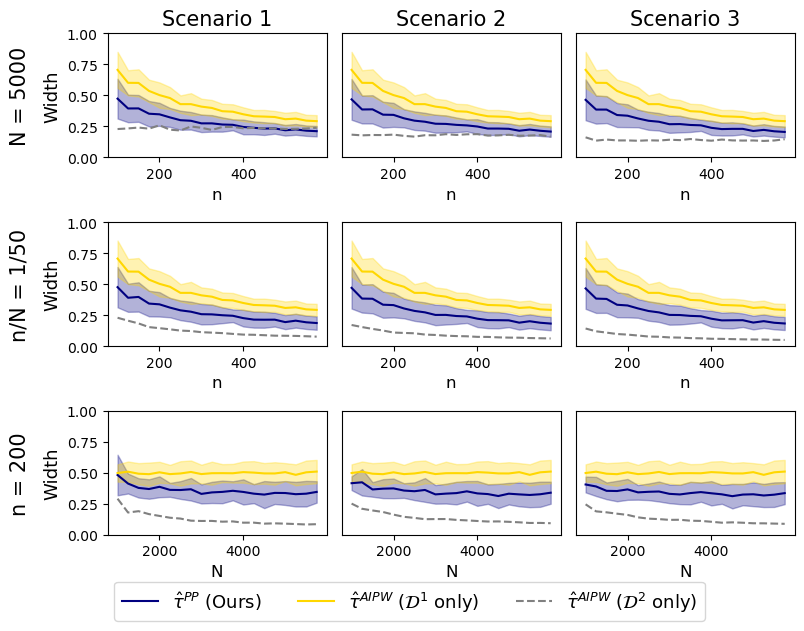

In [8]:
exp_name = "rct_data" # "synthetic_data", "rct_data"
name_list = ["normal_ppi", "normal_aipw", "normal_obs"]
read_dir = f"{path}/code/{exp_name}/experiments_n/exp_results/"

seed_list = [0, 1, 2, 3, 4]
scenario_list = ["scenario_1", "scenario_2", "scenario_3"]
# scenario_list = ["scenario_1", "scenario_1", "scenario_1"]
scenario_name_dic = {"scenario_1": "Scenario 1","scenario_2": "Scenario 2", "scenario_3": "Scenario 3"}
sample_list = ["small_n", "ratio", "large_N"]
sample_title_dic = {"small_n": "N = 5000", "ratio": "n/N = 1/50", "large_N": "n = 200"}

fig, ax = plt.subplots(3, 3, figsize=(8, 6))

for scenario_name, sample_name in itertools.product(scenario_list, sample_list):
    scenario_index = scenario_list.index(scenario_name)
    sample_index = sample_list.index(sample_name)

    width_list = [[] for i in range(len(name_list))]
    for seed in seed_list:
        df = pd.read_csv(f"{read_dir}/{scenario_name}/{sample_name}/estimates_{seed}.csv")
        for name in name_list:
            width_list[name_list.index(name)].append(np.array(df[name + '_width'].tolist()).reshape(-1, 1))

    for name in name_list:
        i = name_list.index(name)
        if sample_name == "large_N":
            x_visual = np.array(df['n_obs'].to_list())
        else:
            x_visual = np.array(df['n_rct'].to_list())
        width = width_list[i]
        width = np.concatenate(width, axis = 1)
        width_mean = np.mean(width, axis = 1)
        width_std = np.std(width, axis = 1)
        if name == "normal_obs":

            ax[sample_index, scenario_index].plot(x_visual, width_mean, linestyle = 'dashed', label = label_dic[name], color = color_dic[name])
        else:
            ax[sample_index, scenario_index].plot(x_visual, width_mean, label = label_dic[name], color = color_dic[name])
            ax[sample_index, scenario_index].fill_between(x_visual, width_mean - width_std, width_mean + width_std, alpha = 0.3, color = color_dic[name])


    if sample_name == "large_N":
        ax[sample_index, scenario_index].set_xlabel("N", fontsize=font_size-3)
    else:
        ax[sample_index, scenario_index].set_xlabel("n", fontsize=font_size-3)

    if scenario_name == "scenario_1":
        ax[sample_index, scenario_index].set_ylabel("Width", fontsize=font_size-2)
        # ax[scenario_index, sample_index].set_yticks([0, 1], ['0.0', '1.0'], fontsize = 10)
        # ax[scenario_index, sample_index].set_ylim([-0.1, 1.1])
        ax[sample_index, scenario_index,].text(-0.4, 0.5, sample_title_dic[sample_name], rotation=90, verticalalignment='center', horizontalalignment='center', transform=ax[sample_index, scenario_index].transAxes, fontsize=font_size)
    else:
        ax[sample_index, scenario_index].set_yticks([])
        # pass

    ax[sample_index, scenario_index].set_ylim([0, 1])
    
    if sample_name == "small_n":
        ax[sample_index, scenario_index].set_title(scenario_name_dic[scenario_name], fontsize=font_size)

    handles, labels = ax[sample_index, scenario_index].get_legend_handles_labels()

unique = dict(zip(labels, handles))
fig.legend(unique.values(), unique.keys(), loc='lower center', bbox_to_anchor=(0.5, -0.06), ncol=3, fontsize=font_size-2)
plt.tight_layout()
plt.savefig(f"{path}/figs/results/{exp_name}/experiments_n.pdf", bbox_inches="tight")
plt.show()

## MIMIC data

## COVID-19 ethnicity

In [6]:
# true ate region 56.249203296342344
# true ate ethnics 40.596671805813706
# true ate mimic 40.596671805813706
# true_ate_dic = {""}
exp_name = "covid_data" # "synthetic_data", "RCT_data"
name_list = ["normal_ppi", "normal_aipw", "normal_obs"]
read_dir = f"{path}/code/{exp_name}/experiments_ethnics/exp_results"

seed_list = [0]
scenario_list = ["scenario_1"]
sample_list = ["small_n", "ratio", "large_N"]


for scenario_name, sample_name in itertools.product(scenario_list, sample_list):

    width_list = [[] for i in range(len(name_list))]
    est_list = [[] for i in range(len(name_list))]
    for seed in seed_list:
        df = pd.read_csv(f"{read_dir}/{scenario_name}/{sample_name}/estimates_{seed}.csv")
        for name in name_list:
            width_list[name_list.index(name)].append(np.array(df[name + '_width'].tolist()).reshape(-1, 1))
            est_list[name_list.index(name)].append(np.array(df[name + '_est'].tolist()).reshape(-1, 1))

    for name in name_list:
        i = name_list.index(name)

        est = est_list[i]
        est = np.concatenate(est, axis = 1)
        est_mean = np.mean(est, axis = 1)
        true_ate = np.ones_like(est) * 40.596671805813706
        rmse = np.sqrt(np.power(est_mean - true_ate, 2).mean())
        print(name, sample_name, "rmse", rmse)
        
        width = width_list[i]
        width = np.concatenate(width, axis = 1)
        width_mean = np.mean(width, axis = 1)
        print(name, sample_name, "mean width", width_mean.mean())


normal_ppi small_n rmse 39.99958469035514
normal_ppi small_n mean width 0.03128980583689321
normal_aipw small_n rmse 39.96899569670942
normal_aipw small_n mean width 0.08103532222654794
normal_obs small_n rmse 39.96338747299337
normal_obs small_n mean width 0.00754298640243229
normal_ppi ratio rmse 39.999189611990715
normal_ppi ratio mean width 0.02584535577467197
normal_aipw ratio rmse 39.96899569670942
normal_aipw ratio mean width 0.08103532222654794
normal_obs ratio rmse 39.97003019257195
normal_obs ratio mean width 0.00409698719844981
normal_ppi large_N rmse 39.9883847158014
normal_ppi large_N mean width 0.042511581243546565
normal_aipw large_N rmse 39.96813058863538
normal_aipw large_N mean width 0.07775962058839711
normal_obs large_N rmse 39.94220949665454
normal_obs large_N mean width 0.034341071805630057


## COVID-19 region calculation

In [ ]:
# true ate region 56.249203296342344
# true ate ethnics 40.596671805813706
# true ate mimic 40.596671805813706
# true_ate_dic = {""}
exp_name = "covid_data" # "synthetic_data", "RCT_data"
name_list = ["normal_ppi", "normal_aipw", "normal_obs"]
read_dir = f"{path}/code/{exp_name}/experiments_region/exp_results"

seed_list = [0]
scenario_list = ["scenario_1"]
sample_list = ["small_n", "ratio", "large_N"]


for scenario_name, sample_name in itertools.product(scenario_list, sample_list):

    width_list = [[] for i in range(len(name_list))]
    est_list = [[] for i in range(len(name_list))]
    for seed in seed_list:
        df = pd.read_csv(f"{read_dir}/{scenario_name}/{sample_name}/estimates_{seed}.csv")
        for name in name_list:
            width_list[name_list.index(name)].append(np.array(df[name + '_width'].tolist()).reshape(-1, 1))
            est_list[name_list.index(name)].append(np.array(df[name + '_est'].tolist()).reshape(-1, 1))

    for name in name_list:
        i = name_list.index(name)

        est = est_list[i]
        est = np.concatenate(est, axis = 1)
        est_mean = np.mean(est, axis = 1)
        true_ate = np.ones_like(est) * 56.249203296342344
        rmse = np.sqrt(np.power(est_mean - true_ate, 2).mean())
        print(name, sample_name, "rmse", rmse)
        
        width = width_list[i]
        width = np.concatenate(width, axis = 1)
        width_mean = np.mean(width, axis = 1)
        print(name, sample_name, "mean width", width_mean.mean())


normal_ppi small_n rmse 39.99958469035514
normal_ppi small_n mean width 0.03128980583689321
normal_aipw small_n rmse 39.96899569670942
normal_aipw small_n mean width 0.08103532222654794
normal_obs small_n rmse 39.96338747299337
normal_obs small_n mean width 0.00754298640243229
normal_ppi ratio rmse 39.999189611990715
normal_ppi ratio mean width 0.02584535577467197
normal_aipw ratio rmse 39.96899569670942
normal_aipw ratio mean width 0.08103532222654794
normal_obs ratio rmse 39.97003019257195
normal_obs ratio mean width 0.00409698719844981
normal_ppi large_N rmse 39.9883847158014
normal_ppi large_N mean width 0.042511581243546565
normal_aipw large_N rmse 39.96813058863538
normal_aipw large_N mean width 0.07775962058839711
normal_obs large_N rmse 39.94220949665454
normal_obs large_N mean width 0.034341071805630057


## MIMIC Data calculation

In [10]:
# true ate region 56.249203296342344
# true ate ethnics 40.596671805813706
# true ate mimic 0.5698046562091958

exp_name = "mimic_data" # "synthetic_data", "RCT_data"
name_list = ["normal_ppi", "normal_aipw", "normal_obs"]
read_dir = f"{path}/code/{exp_name}/experiments_n/exp_results"

seed_list = [0, 1, 2, 3, 4, 5]
scenario_list = ["scenario_1"]
sample_list = ["small_n", "ratio", "large_N"]


for scenario_name, sample_name in itertools.product(scenario_list, sample_list):

    width_list = [[] for i in range(len(name_list))]
    est_list = [[] for i in range(len(name_list))]
    for seed in seed_list:
        df = pd.read_csv(f"{read_dir}/{scenario_name}/{sample_name}/estimates_{seed}.csv")
        for name in name_list:
            width_list[name_list.index(name)].append(np.array(df[name + '_width'].tolist()).reshape(-1, 1))
            est_list[name_list.index(name)].append(np.array(df[name + '_est'].tolist()).reshape(-1, 1))

    for name in name_list:
        i = name_list.index(name)

        est = est_list[i]
        est = np.concatenate(est, axis = 1)
        est_mean = np.mean(est, axis = 1)
        true_ate = np.ones_like(est_mean) * 0.5698046562091958
        rmse = np.sqrt(np.power(est_mean - true_ate, 2).mean())
        print(name, sample_name, "rmse", rmse)
        
        width = width_list[i]
        width = np.concatenate(width, axis = 1)
        width_mean = np.mean(width, axis = 1)
        print(name, sample_name, "mean width", width_mean.mean())


normal_ppi small_n rmse 0.059679461227829446
normal_ppi small_n mean width 0.028600555373334953
normal_aipw small_n rmse 0.057195220117953145
normal_aipw small_n mean width 0.07720709964304132
normal_obs small_n rmse 0.0628455948333361
normal_obs small_n mean width 0.007488748809967964
normal_ppi ratio rmse 0.0571490197141867
normal_ppi ratio mean width 0.023175358176594024
normal_aipw ratio rmse 0.057195220117953145
normal_aipw ratio mean width 0.07720709964304132
normal_obs ratio rmse 0.057615148962925467
normal_obs ratio mean width 0.003999303766964123
normal_ppi large_N rmse 0.06603676812858308
normal_ppi large_N mean width 0.0397766146863171
normal_aipw large_N rmse 0.05800598646596773
normal_aipw large_N mean width 0.07473103031003141
normal_obs large_N rmse 0.11619667038883646
normal_obs large_N mean width 0.05582115233977723
